<a href="https://colab.research.google.com/github/Segun12/HDSC21-Quiz/blob/main/Hamoye_Stage_E_done_segun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


# Data preparation

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML portfolio/Hamoye/Dataset/household_power_consumption.txt', sep = ';', header=0,
                 low_memory=False, infer_datetime_format=True,
                 parse_dates={'datetime':[0,1]}, index_col=['datetime']) ## the date and time were parsed and turned to an index_col

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# replacing ? with nan
df.replace('?', 'nan', inplace=True)
df = df.astype('float32')

In [ ]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
print(df.info(),'\n',df.describe)
      

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float32
 1   Global_reactive_power  float32
 2   Voltage                float32
 3   Global_intensity       float32
 4   Sub_metering_1         float32
 5   Sub_metering_2         float32
 6   Sub_metering_3         float32
dtypes: float32(7)
memory usage: 71.2 MB
None


<bound method NDFrame.describe of                      Global_active_power  ...  Sub_metering_3
datetime                                  ...                
2006-12-16 17:24:00                4.216  ...            17.0
2006-12-16 17:25:00                5.360  ...            16.0
2006-12-16 17:26:00                5.374  ...            17.0
2006-12-16 17:27:00                5.388  ...            17.0
2006-12-16 17:28:00                3.666  ...            17.0
...            

*Q11*. Which of the following is a plot of the global_active_power over time?

In [ ]:
df = df.fillna(df.mean()) #filling the missing values with the mean of the column

In [ ]:
#Resampling to daily sampling rates

df_daily = df.resample('D').sum()
print(df_daily.head())

            Global_active_power  ...  Sub_metering_3
datetime                         ...                
2006-12-16          1209.176025  ...          4926.0
2006-12-17          3390.459961  ...         13341.0
2006-12-18          2203.825928  ...         14018.0
2006-12-19          1666.193970  ...          6197.0
2006-12-20          2225.748047  ...         14063.0

[5 rows x 7 columns]


Text(0.5, 1.0, 'Plot of Global_active_power over time')

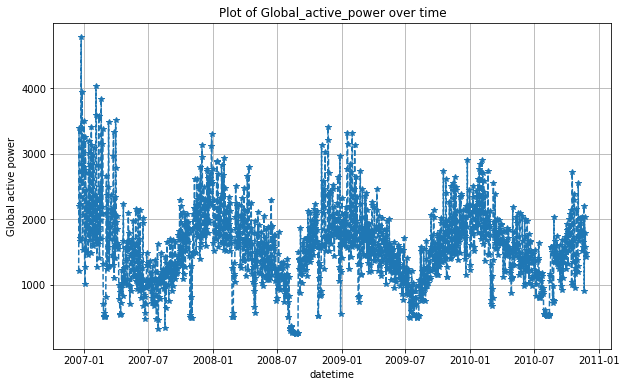

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('datetime')
plt.ylabel('Global active power')
plt.title('Plot of Global_active_power over time')

We can see above the plot of global active power over time

*Q12*. What is the Pearson correlation coefficient between the global_acive_power and global_reactive_power? To 2 DP

**Answer -- 0.94**

In [ ]:
import scipy
import scipy.stats
from scipy.stats import pearsonr

*Q13*. What is the Pearson correlation coefficient between the Voltage and global_intensity? To 2 DP

**Ans 0.27**

*Q14*. Use a sampling rate(sum) divide the data into a tran and test set. The last 365 days is your test set and the first (x-365) days is training set.

What is the MAPE (in%) in 2 DP

**Ans 20.91**

In [ ]:
train_data = df_daily.iloc[:1077,:] #indexing the first 1077 rows of our data as train set

In [ ]:
train_data.shape

(1077, 7)

In [ ]:
test_data = df_daily.iloc[1077:,:] # the last rows i.e 365 rows are indexed as the test set

In [ ]:
test_data.shape

(365, 7)

In [ ]:
from fbprophet import Prophet



In [ ]:

train_data.reset_index(inplace = True)
train_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
df_train = train_data.iloc[:,:2]

In [ ]:
df_train = df_train.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_train.head()

,ds,y
0,2006-12-16,1209.176025
1,2006-12-17,3390.459961
2,2006-12-18,2203.825928
3,2006-12-19,1666.193970
4,2006-12-20,2225.748047


In [ ]:
test_data.reset_index(inplace = True)
test_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2009-11-27,1380.026001,133.052002,348276.68750,5704.000000,0.0,396.0,11599.0
1,2009-11-28,1858.949951,225.218002,347898.87500,7784.799805,3199.0,386.0,14350.0
2,2009-11-29,1650.962036,191.056000,350364.56250,6878.399902,1073.0,3061.0,7828.0
3,2009-11-30,1745.189941,153.382004,351020.59375,7232.200195,1080.0,361.0,12039.0
4,2009-12-01,1756.378052,141.873993,349391.75000,7312.799805,0.0,354.0,10821.0


In [ ]:
df_tests = test_data.iloc[:,:2]

In [ ]:
df_tests = df_tests.rename(columns={"datetime": "ds", "Global_active_power": "y"})
df_tests.head()

,ds,y
0,2009-11-27,1380.026001
1,2009-11-28,1858.949951
2,2009-11-29,1650.962036
3,2009-11-30,1745.189941
4,2009-12-01,1756.378052


In [ ]:
model = Prophet()
model.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(df_tests) 
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1580.084009,1488.179302,2629.450130,1580.084009,1580.084009,519.056899,519.056899,519.056899,-64.127019,-64.127019,-64.127019,583.183918,583.183918,583.183918,0.0,0.0,0.0,2099.140908
1,2009-11-28,1580.207768,1797.170772,2962.807614,1580.207768,1580.207768,822.213567,822.213567,822.213567,245.813256,245.813256,245.813256,576.400311,576.400311,576.400311,0.0,0.0,0.0,2402.421335
2,2009-11-29,1580.331526,1847.868827,2938.276046,1580.331526,1580.331526,796.157722,796.157722,796.157722,228.519177,228.519177,228.519177,567.638545,567.638545,567.638545,0.0,0.0,0.0,2376.489248
3,2009-11-30,1580.455285,1410.524734,2511.568806,1580.455285,1580.455285,396.118617,396.118617,396.118617,-161.286790,-161.286790,-161.286790,557.405408,557.405408,557.405408,0.0,0.0,0.0,1976.573902
4,2009-12-01,1580.579043,1560.135886,2664.640986,1580.579043,1580.579043,516.895388,516.895388,516.895388,-29.332428,-29.332428,-29.332428,546.227816,546.227816,546.227816,0.0,0.0,0.0,2097.474431


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries



,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2009-11-27,2099.140908,1488.179302,2629.450130,1580.084009,1580.084009,1580.084009
1,2009-11-28,2402.421335,1797.170772,2962.807614,1580.207768,1580.207768,1580.207768
2,2009-11-29,2376.489248,1847.868827,2938.276046,1580.331526,1580.331526,1580.331526
3,2009-11-30,1976.573902,1410.524734,2511.568806,1580.455285,1580.455285,1580.455285
4,2009-12-01,2097.474431,1560.135886,2664.640986,1580.579043,1580.579043,1580.579043


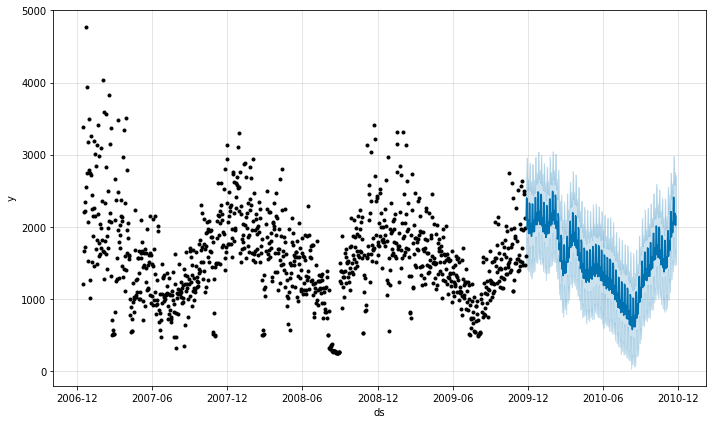

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [ ]:
MAPE = Metric(df_tests['y'],forecast['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(MAPE,2)}')

The Mean Average Percentage Error ( MAPE) is: 20.82


*Q15*. What is the RMSE in 2 decimal place?

**Answer 375.10**

In [ ]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(df_tests['y'],forecast['yhat']))
RMSE
round(RMSE,4)

374.6042

*Q16.* If you plot the components from the forecasted model, what month of the yearly seasonality has the lowest value?

**Answer August**

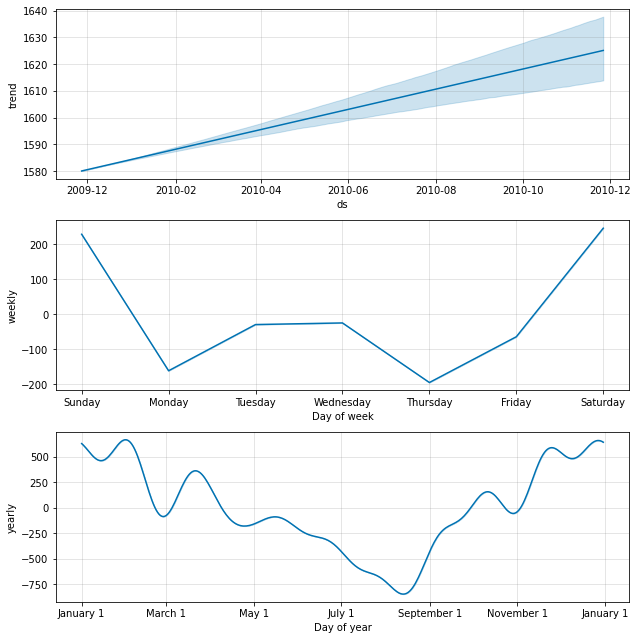

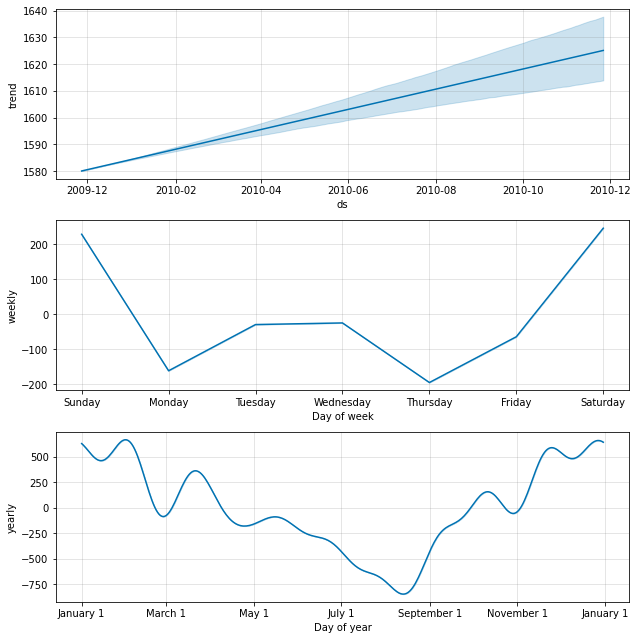

In [ ]:
model.plot_components(forecast)

From the plot, the month of ***"August"*** has the lowest value




*Q17*. Multivariate Time Series Forecasting with Facebook Prophet In the last exercise, we used only the dependent variable (Global_Active_Power) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables.
Evaluating the results of your time series modeling on the test set, what is the MAPE (in %) in 2 decimal places?

**Answer 2.52**

In [ ]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
df_daily.shape

(1442, 7)

In [ ]:
df_daily.reset_index(inplace=True)

In [ ]:
df_daily.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [ ]:
New_df_daily = df_daily.rename(columns = {'datetime':'ds','Global_active_power':'y',
                                           'Global_reactive_power':'add1','Voltage':'add2',
                                           'Global_intensity':'add3','Sub_metering_1':'add4',
                                          'Sub_metering_2':'add5','Sub_metering_3':'add6'})

In [ ]:
New_df_daily.head(2)

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0


In [ ]:
#taking the first hundred observations for training
New_train = New_df_daily.iloc[:1077,:]
New_test = New_df_daily.iloc[1077:,:]
print(New_test.shape)
print(New_train.shape)

(365, 8)
(1077, 8)


In [ ]:
#creating the model
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [ ]:
#fitting the model to train data
model = model.fit(New_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#making prediction with test set
prediction = model.predict(New_test)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,add2_lower,add2_upper,add3,add3_lower,add3_upper,add4,add4_lower,add4_upper,add5,add5_lower,add5_upper,add6,add6_lower,add6_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1597.207251,1365.148149,1397.520309,1597.207251,1597.207251,7.516635,7.516635,7.516635,0.616011,0.616011,0.616011,-232.333805,-232.333805,-232.333805,2.202791,2.202791,2.202791,0.825649,0.825649,0.825649,3.864961,3.864961,3.864961,-216.018146,-216.018146,-216.018146,-217.307759,-217.307759,-217.307759,-0.101979,-0.101979,-0.101979,1.391591,1.391591,1.391591,0.0,0.0,0.0,1381.189105
1,2009-11-28,1597.347956,1844.699043,1877.673182,1597.347956,1597.347956,-8.857395,-8.857395,-8.857395,0.505812,0.505812,0.505812,263.405656,263.405656,263.405656,-2.028400,-2.028400,-2.028400,0.830930,0.830930,0.830930,7.751815,7.751815,7.751815,264.708105,264.708105,264.708105,261.608418,261.608418,261.608418,1.386425,1.386425,1.386425,1.713262,1.713262,1.713262,0.0,0.0,0.0,1862.056061
2,2009-11-29,1597.488661,1627.850521,1660.583674,1597.488661,1597.488661,-2.788241,-2.788241,-2.788241,1.224994,1.224994,1.224994,47.460713,47.460713,47.460713,0.783576,0.783576,0.783576,-0.581772,-0.581772,-0.581772,-1.463038,-1.463038,-1.463038,46.847909,46.847909,46.847909,44.636232,44.636232,44.636232,0.141167,0.141167,0.141167,2.070510,2.070510,2.070510,0.0,0.0,0.0,1644.336570
3,2009-11-30,1597.629366,1727.416848,1758.394039,1597.629366,1597.629366,3.904847,3.904847,3.904847,1.416343,1.416343,1.416343,131.751742,131.751742,131.751742,0.774317,0.774317,0.774317,0.844133,0.844133,0.844133,4.486631,4.486631,4.486631,145.311316,145.311316,145.311316,143.178013,143.178013,143.178013,-0.334593,-0.334593,-0.334593,2.467896,2.467896,2.467896,0.0,0.0,0.0,1742.940683
4,2009-12-01,1597.770071,1746.015388,1779.469460,1597.770071,1597.770071,5.949337,5.949337,5.949337,0.941248,0.941248,0.941248,150.954176,150.954176,150.954176,2.202791,2.202791,2.202791,0.847829,0.847829,0.847829,2.765734,2.765734,2.765734,164.911595,164.911595,164.911595,163.661116,163.661116,163.661116,-1.658690,-1.658690,-1.658690,2.909169,2.909169,2.909169,0.0,0.0,0.0,1762.681666


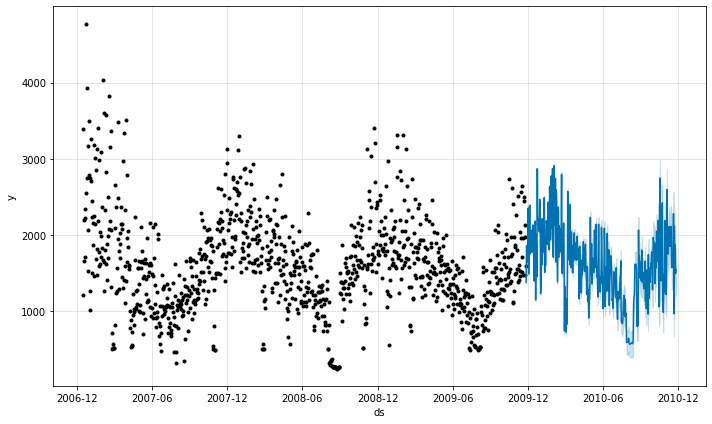

In [ ]:
model.plot(prediction)
plt.show()

In [ ]:
def Metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [ ]:
MAPE = Metric(New_test['y'],prediction['yhat'])
print(f'Mean Average Percentage Error ( MAPE) is:{round(MAPE,2)}')

Mean Average Percentage Error ( MAPE) is:3.04


*Q18*. What is the RMSE in 2 decimal place?

**Ans 39.87**

In [ ]:
# RMSE
RMSE = np.sqrt(metrics.mean_squared_error(New_test['y'],prediction['yhat']))
RMSE
round(RMSE,4)

44.8791

*Q19*. If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the lowest value?

**Ans -- Tuesday**

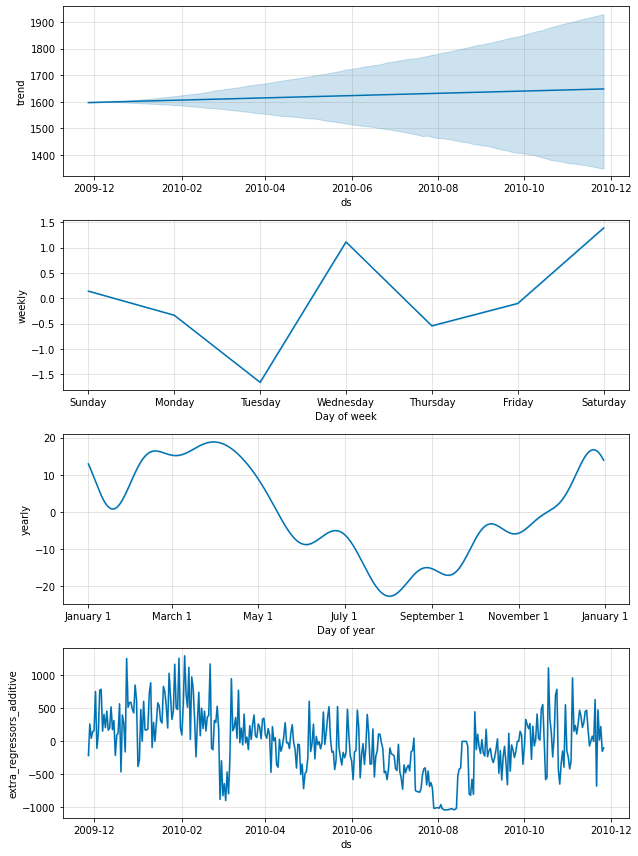

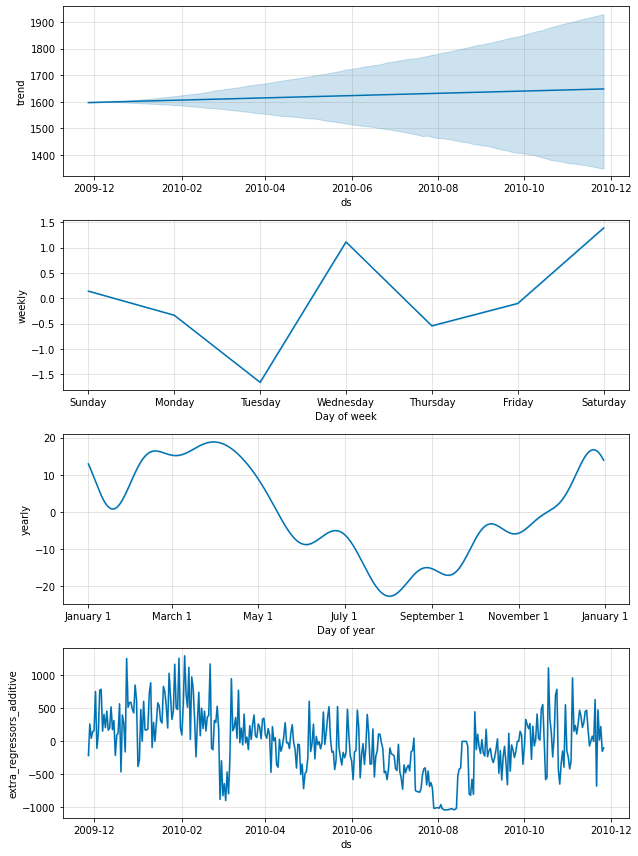

In [ ]:
model.plot_components(prediction)

From the plot that **"Tuesday"** showed seasonality with the lowest value



*Q20*. Sometimes, filling missing values in a time series dataset with the mean can lead to over- or under-variability of the dataset properties. What other missing data imputation method can be used to improve this variability for time series datasets?

**Answer -- Forward fill**